# KELOMPOK 2

### Aido Luthfi Al Hakim	(2141720136)
### Evi Amalia Midfia		(2141720030)
### Muhammad Hatta		(2141720021)
### Tesya Eriana			(2141720024)


In [1]:
# Import library yang diperlukan

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

2023-11-01 13:01:20.317893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 13:01:21.249743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

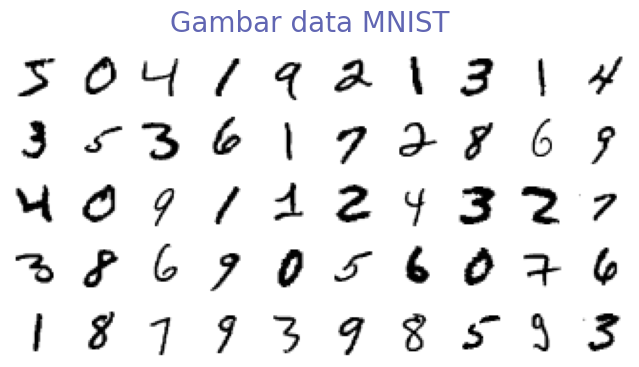

In [3]:
# menampilkan data inputan (hidden input)

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols
        
        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

In [4]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


In [5]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [6]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

2023-11-01 13:01:24.250761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


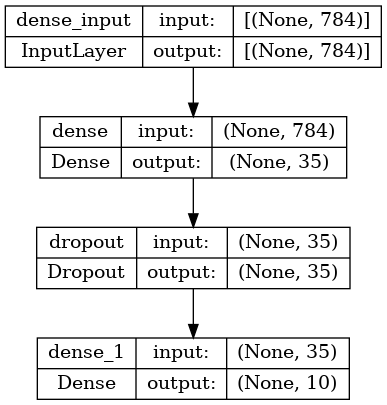

In [7]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)
plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [8]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


2023-11-01 13:01:25.440232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-01 13:01:25.465259: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7c0a010f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 13:01:25.465287: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-01 13:01:25.471715: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 13:01:25.491737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-01 13:01:25.661266: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1875/1875 [==============================] - 6s 2ms/step - loss: 0.5238 - accuracy: 0.8457
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.9037
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.9163
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2547 - accuracy: 0.9230
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9270
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2276 - accuracy: 0.9309
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9329
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9344
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2038 - accuracy: 0.9359
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1996 

KeyboardInterrupt: 

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)


ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)


In [ ]:
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

In [ ]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

# Model dengan konfigurasi lain

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

In [ ]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

In [ ]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [ ]:

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

nn_model.summary()

plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = nn_model.fit(x_train, y_train, epochs=100)

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)


ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)


In [ ]:
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy_score(y_test,y_pred)

In [ ]:
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

In [ ]:
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size